In [ ]:
!pip install qpsolvers[open_source_solvers]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.9/959.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 735.7/735.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
from qpsolvers import solve_qp
import matplotlib.pyplot as plt
import pandas as pd

# **Training Support Vector Machines for binary classification**

Consider a dataset of input-label pairs $(\mathbf{x}^i,y^i)$, namely the training set $T:=\{(\mathbf{x}^i,y^i), \mathbf{x}^i \in \mathbb{R}^n,y^i\in \{-1,1\}, i=1,\cdots,p\}$, where the values $1$ or $-1$ assumed by the labels $y^i$ correspond to the membership of the vector $\mathbf{x}^i$ to one of two different classes. Support Vector Machines (SVMs) construct an $n-$dimensional hyperplane of the form
\begin{align}
 \mathbf{w}^T\mathbf{x}+b=0 & & & & (1)
\end{align}
that separates the points in $T$ according to their class memebership.
As seen in the lectures, in the case of linearly separable training sets $T$, the problem of determining such a *separating hyperplane* (1) can be formulated as follows

\begin{align}
 &\min_{\mathbf{w},b} \  \frac{1}{2}\|\ \mathbf{w} \|^2 & (2a)  \\
 &\mbox{s.t.} \quad y^i(\mathbf{w}^T\mathbf{x}^i+b)\ge 1, \quad  i=1,\dots,p, & (2b)
\end{align}

where the objective function (2a) is related to the maximization of the margin between the training points and the separating hyperplane, and Constraints (2b) ensure that all the points lay into the correct halfspace determined by the hyperplane (1).

By applying to (2a-2b) the Lagrangian dual transformation (**review the steps seen in class concerning the QPs**), we obtain the following \textit{quadratic programming} problem

\begin{align}
 \min_{\mathbf{u}} & \ \frac{1}{2}\mathbf{u}^T Q \mathbf{u} -  \sum_{i=1}^p u_i   & & (3a)\\
 \mbox{s.t.}&    \ \sum_{i=1}^p y^i u_i=0 & & (3b)\\
 &  \  \mathbf{u}\ge 0, & & (3c)
\end{align}

where $\mathbf{u}$ is the $p$-dimensional vector of dual variables with components $u_i , i=1,\dots,p$ associated to the $i$-th constraint (2b) (hence to the pair $(\mathbf{x}^i,y^i)$), while matrix $Q \in \mathbb{R}^{p \times p}$ is symmetric positive semidefinite with elements
\begin{align}
 q_{ij}=y^i y^j {\mathbf{x}^i}^T \mathbf{x}^j. & & & & (4)
\end{align}
Solving (3a-3c) is equivalent to solve (2a-2b) and, as $p$ grows, it is preferable in algorithmic terms since it involves only a single linear constraint (except for the bounds on the variables) instead of the $p$ constraints (2b).

**Linear SVMs with linearly separable data**

When the training set $T$ is linearly separable, like in the two-dimensional *linsep30* dataset with $30$ points reported in the figure below, formulation (2a-2b) or (3a-3c) are actually able to determine an optimal (maximum margin) separating hyperplane that correctly classifies all points in the dataset.

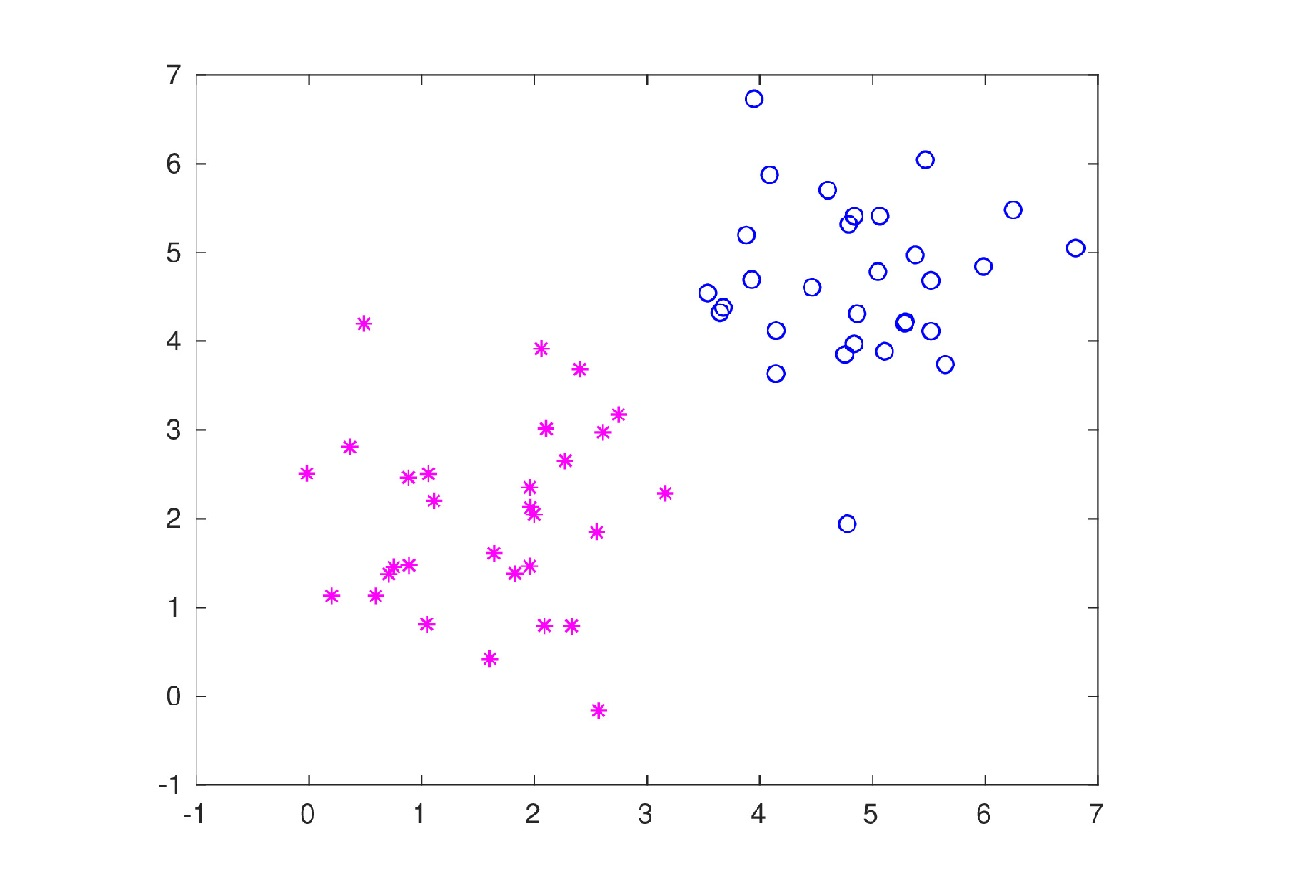

Use formulation (3a-3c) to determine the optimal hyperplane for the *linsep30* dataset.
In particular


*   complete the python function *createQmatrix* that, for a given dataset, takes as input all vectors $\mathbf{x}^i$ and labels $y^i$ with $i=1,\dots,p$, and returns as output the matrix $Q$ of (3a)
*   complete the python script *linear svm* which

      1.   constructs formulation (3a-3c) for the dataset *linsep30* (exploiting *createQmatrix*),
      2.   solves the formulation by using the **qpsolvers** package for quadratic programs,
      3. computes the coefficients of the optimal separating hyperplane.

In [ ]:
# Create Q matrix
def create_Q_matrix(X, Y):
    # compute all elements q_ij of the symmetric matrix Q
    return Q


In [ ]:
# Load dataset
dataset = pd.read_csv('linsep30.txt',sep=',')
Y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values
p, n = X.shape
eps = 1e-6

# create the dual SVM formulation

# Solve quadratic program

u = solve_qp(..., solver='cvxopt')


# reconstruct the original separating hyperplane


# compute the number of misclassified point




**Soft margin formulation: linear SVMs for nonlinearly separable data sets**

In many practical applications, training sets are nonlinearly separable, so that formulation (2a-2b) and its dual (3a-3c) cannot be applied to determine the optimal separating hyperplane as (2a-2b) would be infeasible. Nontheless, a linear spearating surface might be desirable, since the data points preventing the linear separability may be considered irrelevant outliers or noisy. See figure below reporting *nonlinsep50* dataset consists of $50$ nonlinearly separable points.

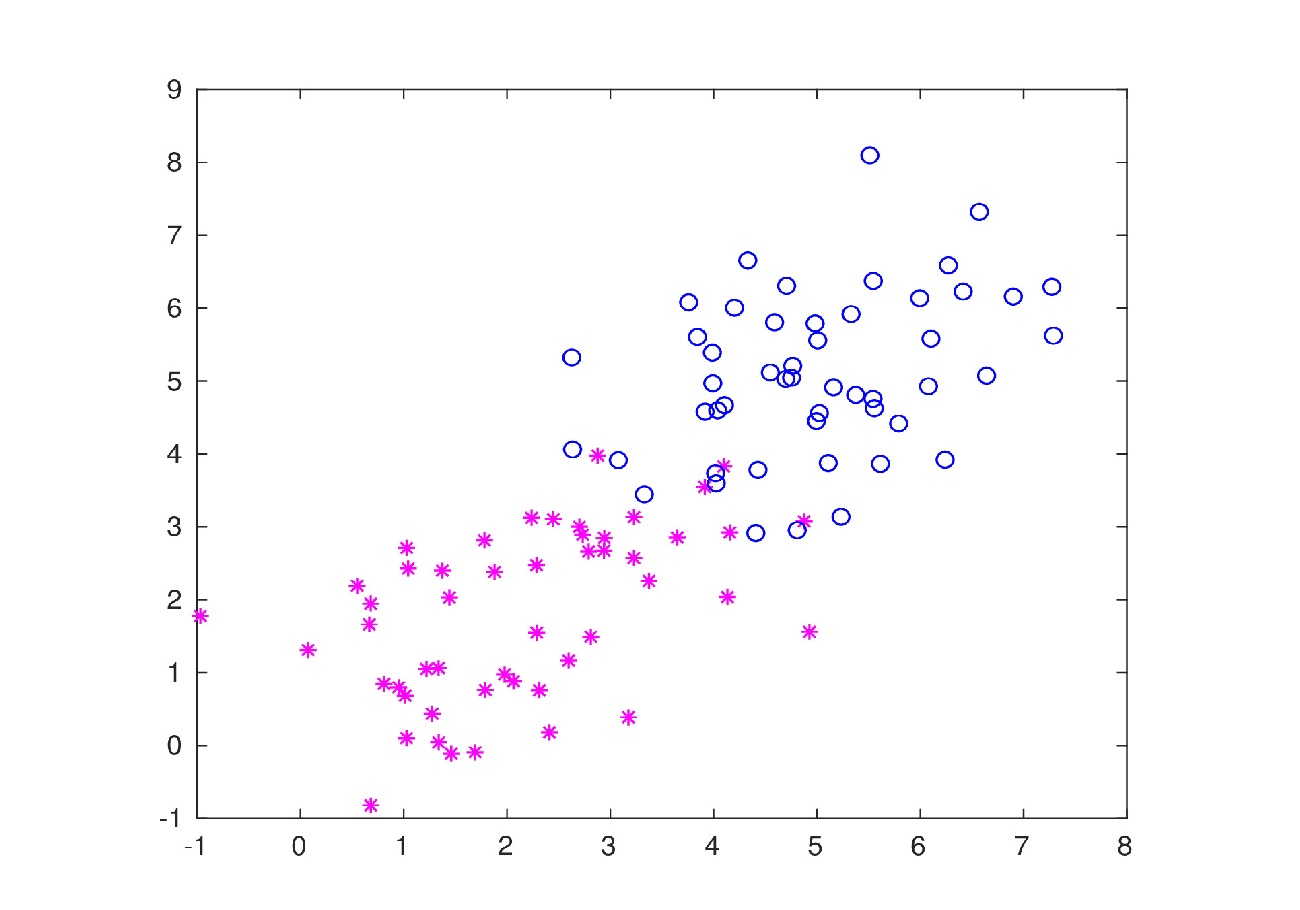

In these cases the following *soft margin* formulation is used

\begin{align}
 &\min_{\mathbf{w},b,\mathbf{\xi}} \   \frac{1}{2}\|\ \mathbf{w} \|^2+C\sum_{i=1}^p \xi_i & & (7a) \\
 &\mbox{s.t.} \quad y^i(\mathbf{w}^T\mathbf{x}^i+b)\ge 1-\xi_i, \quad  i=1,\dots,p & & (7b)\\
 & \quad\quad \xi_i \ge 0, \quad i=1,\dots,p, & & (7c)
\end{align}

where each component $\xi_i$ of the $p$-dimensional vector $\mathbf{\xi}$ is a *slack* nonnegative variable, used in the $i$-th constraint (7b) to allow a violation of the correct classification requirement. The additional term $\sum_{i=1}^p \xi_i$ in the objective function aims to reduce the sum of these slack variables. It can be verified that $\sum_{i=1}^p \xi_i$ is an upper bound of the number of misclassified points of the training set. The weight $C$, set by the user, is tuned to achieve a reasonable trade-off between the first term (maximization of the margin) and the second term (minimization of the classification violations).

The Lagrangian dual of (7a-7c) is

\begin{align}
 \min_{\mathbf{u}} & \ \frac{1}{2}\mathbf{u}^T Q \mathbf{u} -  \sum_{i=1}^p u_i   & & (8a)\\
 \mbox{s.t.}&    \ \sum_{i=1}^p y^i u_i=0 & & (8b) \\
 &  \  0\leq \mathbf{u}\leq C, & & (8c)
\end{align}

where the only difference with respect to (3a-3c) is the presence of the upper bound $C$ on the dual variables vector $\mathbf{u}$.
Once (8a-8c) is solved, $\mathbf{w}^*$ can be obtained by using (5) as in the linear case, while $b^*$ is obtained as
\begin{align}
 b^*=\frac{1}{y^i}-{\mathbf{w}^*}^T \mathbf{x}^i \quad \text{for any} \quad 0<u_i^*<C. & & (9)
\end{align}

Notice that the only difference between (6) and (9) is the condition $0<u_i^*<C$ instead of $u_i^*>0$.

Taking inspiration from the *linear svm* script, create the script *soft margin* to construct formulation (8a-8c) for dataset *nonlinsep50* and to determine the optimal hyperplane. Add to the script a module to compute the misclassified points (notice that a point $(\mathbf{x}^i,y^i)$ is missclassified whenever $y^i({\mathbf{w^*}^T \mathbf{x}^i+b})<0$). Solve the quadratic program with $C=0.1$ and $C=1$. What do you observe in terms of misclassified points and in terms of margin in the two cases?

In [ ]:
# Load dataset
dataset = pd.read_csv('nonlinsep50.txt',sep=',')
Y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values
p, n = X.shape
eps = 1e-6
C= 1




u = solve_qp(..., solver='cvxopt')

# reconstruct the original separating hyperplane


# compute the number of misclassified point


**Nonlinear SVMs: the kernel formulation**

When a nonlinear sperating surface is better suited to correctly classify the training set, like in the *nonlinear50* dataset reported in figure below, the $n$-dimensional vectors $\mathbf{x^i}$ can be mapped to a higher dimensional space (possibly infinite), called *feature space*, where training points are more likely to be linearly separable.

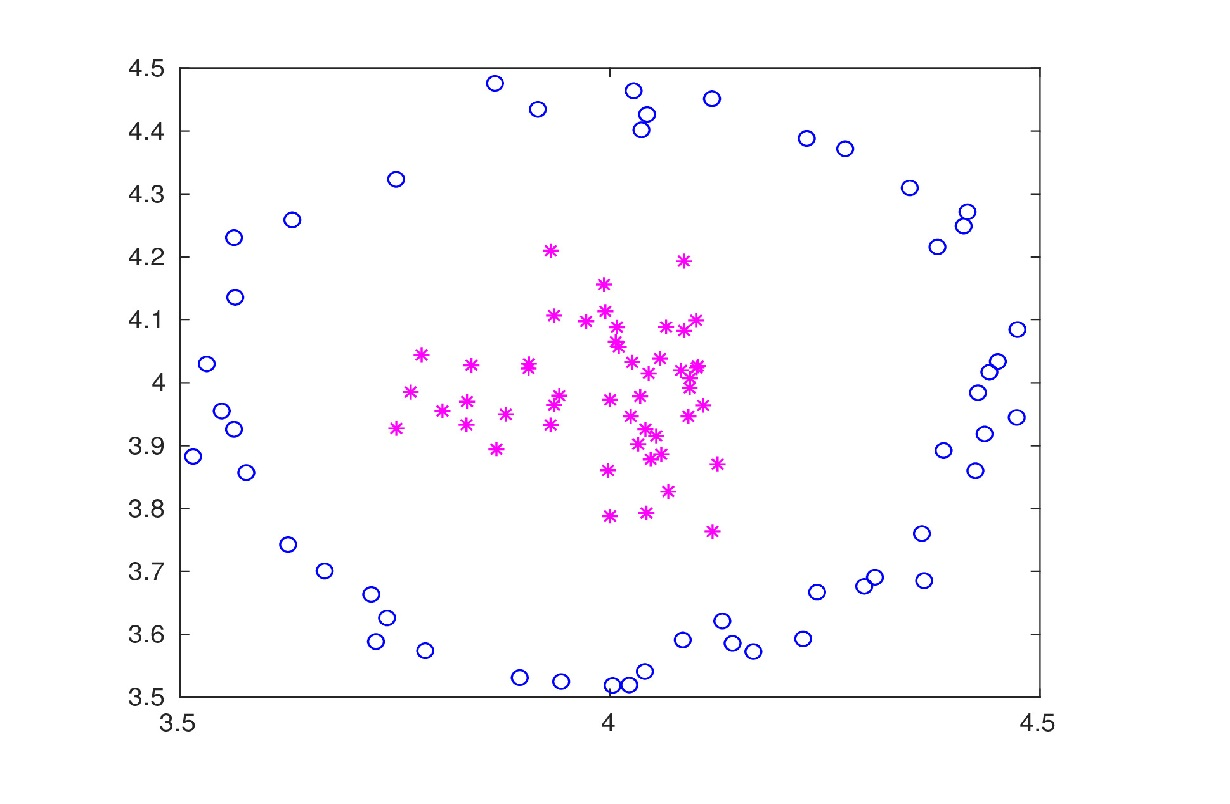

 Consider a nonlinear mapping $\phi:\mathbb{R}^n \rightarrow {\cal H}$, where ${\cal H}$ is a space whose dimension is higher than $n$. A function $k:\mathbb{R}^n \times \mathbb{R}^n  \rightarrow \mathbb{R}$ is a \textit{kernel} if ${\cal K}(\mathbf{x}^i,\mathbf{x}^j)=\phi(\mathbf{x}^i)^T \phi(\mathbf{x}^j)$. The idea is to apply the methodology of the linear SVMs in an higher dimensional space, by replacing the input vectors $\mathbf{x}^i$ with $\phi(\mathbf{x}^i)$. The the dual problem turns into

\begin{align}
 \min_{\mathbf{u}} & \ \frac{1}{2}\mathbf{u}^T K \mathbf{u} -  \sum_{i=1}^p u_i  & & (10a) \\
 \mbox{s.t.}&    \ \sum_{i=1}^p y^i u_i=0 & & (10b)\\
 &  \  0\leq \mathbf{u}\leq C, & & (10c)
\end{align}

where the $p \times p$ matrix $K$ has components $k_{ij}=y^i y^j{\cal K}(\mathbf{x}^i,\mathbf{x}^j)=y^i y^j\phi(\mathbf{x}^i)^T \phi(\mathbf{x}^j)$. Since $K$ is symmetric and positive semidefinite, (10a-10c) is a convex quadratic program.

Once (10a-10c) is solved, the optimal coefficients of the separating surface are computed as
\begin{align}
 \mathbf{w}^*=\sum_{i=1}^p u_i^* y^i \phi(\mathbf{x}^i) & & (11)
\end{align}
and
\begin{align}
 b^*=\frac{1}{y^i}-\sum_{j=1}^p u_j^* y^j {\cal K}(\mathbf{x}^j,\mathbf{x}^i) \quad \mbox{for any} \quad  0<u_i^*<C. & & (12)
\end{align}

For any vector $\mathbf{x}$, it is possible to determine to which class $\mathbf{x}$ belongs to by using the decision function

\begin{align}
sgn({\mathbf{w}^*}^T \phi(\mathbf{x})+b^*), & & (13)
\end{align}
which amounts to
\begin{align}
 sgn(\sum_{i=1}^p u_i^* y^i {\cal K}(\mathbf{x}^i,\mathbf{x})+b^*). & & (14)
\end{align}
 Note that if the kernel ${\cal K}(\mathbf{x}^i,\mathbf{x}^j)$ can be computed in a simple closed form, it is not needed the explicit computation of the mapping $\phi(\cdot)$, as $\phi$ is embedded in the closed form computation of kernel elements in (10a), (12) and (14). This technique is known as *kernel trick* and it is helpful when the feature space dimension large (infinite). Notice that the separating surface ${\mathbf{w}^*}^T \phi(\mathbf{x})+b^*$ is linear in the feature space.


Consider the following mapping $\phi: \mathbb{R}^2\rightarrow \mathbb{R}^6$
\begin{align}
 \phi\begin{pmatrix} x_1 \\ x_2\end{pmatrix} := \begin{pmatrix} 1 \\ x_1^2 \\ x_2^2 \\ \sqrt{2} x_1 \\ \sqrt{2} x_2 \\ \sqrt{2} x_1 x_2 \end{pmatrix} & & & (15)
\end{align}
associated to the polynomial kernel of degree two
\begin{align}
 {\cal K}(\mathbf{x}^i,\mathbf{x}^j)=({\mathbf{x}^i}^T \mathbf{x}^j+1)^2. & & (16)
\end{align}

By adopting mapping (15) with kernel (16), use formulation (10a-10c) to determine the optimal separating surface for the *nonlinear50* dataset.
In particular



*   complete the python function *kernel* that takes as input two ($2$-dimensional) vectors $\mathbf{x}^i$ and $\mathbf{x}^j$ and returns as output ${\cal K}(\mathbf{x}^i,\mathbf{x}^j)=\phi(\mathbf{x}^i)^T \phi(\mathbf{x}^j)$, where $\phi$ and ${\cal K}$ are defined as in (15) and (16).
*   taking inspiration from *createQmatrix* function, create the python function *createKmatrix* that, for any given dataset, takes as input all vectors $\mathbf{x}^i$ and labels $y^i$ with $i=1,\dots,p$, and gives as output the matrix $K$ of (10a) by exploiting the python function *kernel*.

*   taking inspiration from *svm soft margin* script and exploiting functions *kernel* and *createKmatrix*, create the python script *non linear svm* which
   1.  constructs formulation (10a-10c) for the dataset *nonlinear50*,
   2.  solves the formulation by using the **qpsolvers** package for quadratic programs, for $C=10$, $C=100$ and $C=200$.
   3. computes all misclassified points by using the decision function (13) (notice that since the feature space is made up of only $6$ dimensions, the mapping $\phi(\mathbf{x})$ can be explicitly computed).

*   Compute the optimal separating hyperplane for *nonlinear50* by using the script *non linear svm* with $C=200$ and observe the differences.

In [ ]:
def kernel(xi, xj):
    # compute the kernel elemnt el_ij according to the specific kernel adopted

def create_K_matrix(X, Y):
    # compute all elements k_ij of the symmetric matrix K

    return K




In [ ]:
# Load dataset
dataset = pd.read_csv('nonlinear50.txt',sep=',')
Y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values
p, n = X.shape
eps = 1e-6

u = solve_qp(..., solver='cvxopt')

# reconstruct the original separating hyperplane


# compute the number of misclassified point